# 오피넷 유가정보를 이용한 분석 
- 브랜드별 유류비 분석(어느 브랜드가 저렴한 가격으로 공급하고 있는가?)
- 셀프/주유에 따른 분석(셀프 주유소가 일반 주유소보다 가격이 저렴한가?)
- 지역별로 유류비 가격 분석 

## 1. 데이터 불러오기 및 데이터 정리
- 크롤링 진행
- 하나의 데이터로 만들기

In [3]:
import pandas as pd
from glob import glob

locFriles = glob('../data/oil_data/지역_위치별*.xls')
len(locFriles)

51

In [56]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')  # 경고메세지 활성화

In [7]:
# 데이터 하나만 불러오기 
df = pd.read_excel(locFriles[0])
df.head()

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위 : 원/리터)
1,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
2,광주광역시,(주)반디석유,광주 북구 하남대로 819 (운암동),현대오일뱅크,062-523-8301,N,-,1890,1850,-
3,광주광역시,오치한전주유소,광주 북구 천지인로 91 (오치동),SK에너지,070-8836-5051,Y,-,1918,1838,-
4,광주광역시,(주)대창석유직영 운암주유소,광주 북구 북문대로 34 (운암동),SK에너지,062-525-0716,Y,2150,1920,1860,-


In [6]:
#!pip install xlrd

In [9]:
# 위쪽 불필요한 행 X
df = pd.read_excel(locFriles[0], header = 2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,광주광역시,(주)반디석유,광주 북구 하남대로 819 (운암동),현대오일뱅크,062-523-8301,N,-,1890,1850,-
1,광주광역시,오치한전주유소,광주 북구 천지인로 91 (오치동),SK에너지,070-8836-5051,Y,-,1918,1838,-
2,광주광역시,(주)대창석유직영 운암주유소,광주 북구 북문대로 34 (운암동),SK에너지,062-525-0716,Y,2150,1920,1860,-
3,광주광역시,서광주IC주유소,광주 북구 하서로 47 (운암동),S-OIL,062-514-1372,Y,-,1920,1855,-
4,광주광역시,자모셀프주유소,광주 북구 우치로 7 (중흥동),SK에너지,062-513-9951,Y,-,1928,1848,-


In [66]:
# 엑셀 데이터를 일괄 tmp_df에 넣어주고 
# 이후 pd.concat() 이용해 열 이름 기준으로 행 추가
tmp_df = []
for file in locFriles:
    tmp = pd.read_excel(file, header = 2)
    tmp_df.append(tmp)

# 열 이름 기준으로 행 추가
df = pd.concat(tmp_df, ignore_index=True) # 리스트에 저장한 데이터 열 추가 (index 재설정 옵션) 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      1344 non-null   object
 1   상호      1344 non-null   object
 2   주소      1344 non-null   object
 3   상표      1344 non-null   object
 4   전화번호    1344 non-null   object
 5   셀프여부    1344 non-null   object
 6   고급휘발유   1344 non-null   object
 7   휘발유     1344 non-null   object
 8   경유      1344 non-null   object
 9   실내등유    1344 non-null   object
dtypes: object(10)
memory usage: 105.1+ KB
None


In [67]:
display(df.head(3))
display(df.tail(3))

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,광주광역시,(주)반디석유,광주 북구 하남대로 819 (운암동),현대오일뱅크,062-523-8301,N,-,1890,1850,-
1,광주광역시,오치한전주유소,광주 북구 천지인로 91 (오치동),SK에너지,070-8836-5051,Y,-,1918,1838,-
2,광주광역시,(주)대창석유직영 운암주유소,광주 북구 북문대로 34 (운암동),SK에너지,062-525-0716,Y,2150,1920,1860,-


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
1341,서울특별시,홍능주유소,서울 동대문구 홍릉로 87 (청량리동),S-OIL,02-966-9190,N,-,2025,1955,1500
1342,서울특별시,오동나무주유소,서울 동대문구 한천로 81 (답십리동),S-OIL,02-2247-5132,N,-,2028,1968,1600
1343,서울특별시,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),현대오일뱅크,02-2214-9890,N,-,2190,2090,1590


In [17]:
df.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [68]:
## 필요한 컬럼값만 변수 df_oil에 지정 
# 순서/이름 변경 가능 

# 데이터 가져오기
df_oil = df[['지역', '상호', '주소','휘발유' , '셀프여부', '상표']]
#df_oil = df[:, [0,1,2,6,5,3]]

# 이름 변경 
df_oil.columns = ['시도', '상호', '주소', '가격', '셀프', '상표'] 
 
df_oil.head(3)

,시도,상호,주소,가격,셀프,상표
0,광주광역시,(주)반디석유,광주 북구 하남대로 819 (운암동),1890,N,현대오일뱅크
1,광주광역시,오치한전주유소,광주 북구 천지인로 91 (오치동),1918,Y,SK에너지
2,광주광역시,(주)대창석유직영 운암주유소,광주 북구 북문대로 34 (운암동),1920,Y,SK에너지


In [69]:
## 주소를 이용해 '시군구' 열 추가
# .split() 기본값: 공백 기준으로 문자열 자름 

df_oil['시군구']= [ addr.split()[1] for addr in df_oil['주소']]
df_oil['시군구'].unique()

array(['북구', '노원구', '동작구', '기장군', '관악구', '서구', '부산진구', '중구', '중랑구', '강서구',
       '동구', '남구', '마포구', '금천구', '강북구', '송파구', '사상구', '은평구', '서대문구',
       '연제구', '영도구', '서초구', '광산구', '종로구', '사하구', '양천구', '강동구', '영등포구',
       '강남구', '성동구', '해운대구', '성북구', '수영구', '용산구', '도봉구', '대덕구', '광역시',
       '구로구', '광진구', '동래구', '금정구', '유성구', '동대문구'], dtype=object)

In [26]:
# .contains()에 입력한 데이터가 포함된 자료 검색 
df_oil[df_oil['시도'].str.contains('대전')]

,시도,상호,주소,가격,셀프,상표,시군구
154,대전광역시,그린주유소,대전 서구 동서대로 953,1937,Y,알뜰주유소,서구
155,대전광역시,타임셀프주유소,대전 서구 대덕대로 188 (둔산2동),1954,Y,현대오일뱅크,서구
156,대전광역시,도마진실주유소,대전 서구 도산로 123,1955,Y,S-OIL,서구
157,대전광역시,구봉산셀프주유소,대전 서구 구봉로 208,1955,Y,알뜰주유소,서구
158,대전광역시,굿모닝주유소,대전 서구 계백로 1376 (도마동),1959,Y,현대오일뱅크,서구
...,...,...,...,...,...,...,...
1282,대전광역시,진터벌주유소,대전 유성구 유성대로654번길 168 (봉명동),2057,N,S-OIL,유성구
1283,대전광역시,예성주유소,대전광역시 유성구 도안동로 488,2058,Y,SK에너지,유성구
1284,대전광역시,계룡주유소,대전 유성구 현충원로 177,2195,N,S-OIL,유성구
1285,대전광역시,(주)상아에너지,대전 유성구 계백로 476 (방동),-,N,GS칼텍스,유성구


In [27]:
## '시군구' 값이 '광역시'인 데이터 확인 
df_oil[df_oil['시군구'] == '광역시']

,시도,상호,주소,가격,셀프,상표,시군구
1057,대전광역시,도서관주유소,대전 광역시 중구 보문산로 353,1962,Y,현대오일뱅크,광역시


In [28]:
## '시군구' 값이 '광역시'인 데이터 -> '중구'로 변경 
df_oil.loc[df_oil['시군구']=='광역시', '시군구'] = '중구'
df_oil['시군구'].unique()

/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_21574/2507141641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil.loc[df_oil['시군구']=='광역시', '시군구'] = '중구'


array(['북구', '노원구', '동작구', '기장군', '관악구', '서구', '부산진구', '중구', '중랑구', '강서구',
       '동구', '남구', '마포구', '금천구', '강북구', '송파구', '사상구', '은평구', '서대문구',
       '연제구', '영도구', '서초구', '광산구', '종로구', '사하구', '양천구', '강동구', '영등포구',
       '강남구', '성동구', '해운대구', '성북구', '수영구', '용산구', '도봉구', '대덕구', '구로구',
       '광진구', '동래구', '금정구', '유성구', '동대문구'], dtype=object)

In [30]:
# 가격이 '-'로 입력된 데이터 제거 
df_oil = df_oil[df_oil['가격'] != '-']

# '-'가 포함된 데이터가 있는지 확인
display(df_oil[df_oil['가격'] == '-'])

,시도,상호,주소,가격,셀프,상표,시군구


In [31]:
## 데이터 타입 확인 
df_oil.dtypes

시도     object
상호     object
주소     object
가격     object
셀프     object
상표     object
시군구    object
dtype: object

In [32]:
## 가격 필드의 데이터 타입을 int로 변경 (for문)
df_oil['가격'] = [int(val) for val in df_oil['가격']]

# df_oil = df_oil['가격'].astype({'가격': int}) # 함수사용 

print(df_oil.dtypes)

시도     object
상호     object
주소     object
가격      int64
셀프     object
상표     object
시군구    object
dtype: object


In [33]:
## 데이터에 NaN값이 있는지 확인 
df_oil.isna().sum()

시도     0
상호     0
주소     0
가격     0
셀프     0
상표     0
시군구    0
dtype: int64

## 2. 데이터 분석하기
- 셀프 주유소가 일반 주유소보다 저렴한지 확인
- `boxplot`으로 확인 

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', family='AppleGothic')
    
elif platform.system() == "Windows":
    fontname=font_manager.FontProperties(fname="C:/Windows/Fonts/gulim.ttc").get_name()
    rc('font', family = fontname)
    
else:
    print('시스템 포트 설정 오류~~')

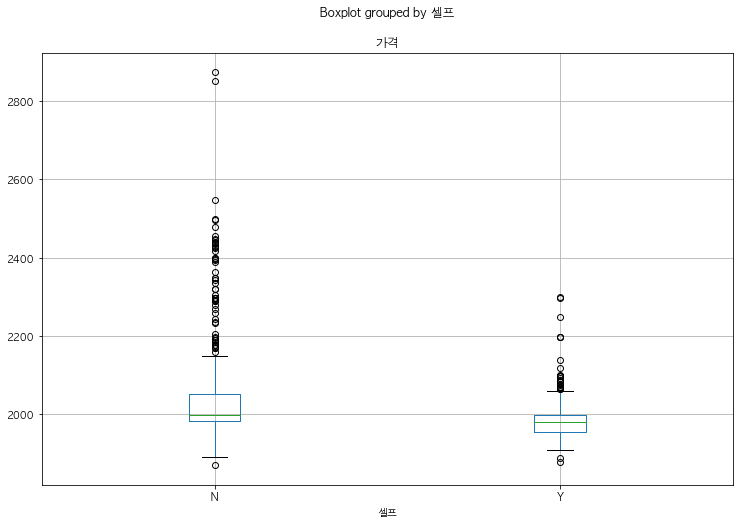

In [59]:
# 가격에 대한 셀프여부에 따라 boxplot
# 보는 방법 참조: https://codedragon.tistory.com/7012

df_oil.boxplot(column='가격', by='셀프', figsize=(12, 8))
plt.show()

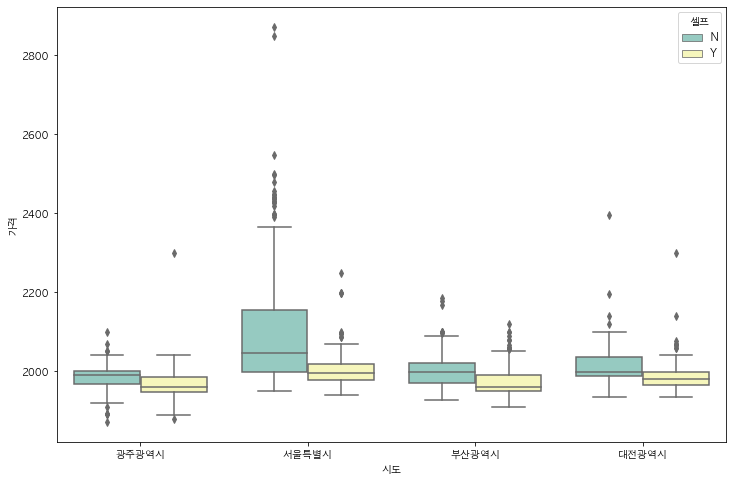

In [60]:
# 시도별/seaborn.boxplot 사용
plt.figure(figsize=(12, 8))
sns.boxplot(x='시도', y='가격', hue='셀프', data=df_oil, palette='Set3')
plt.show()

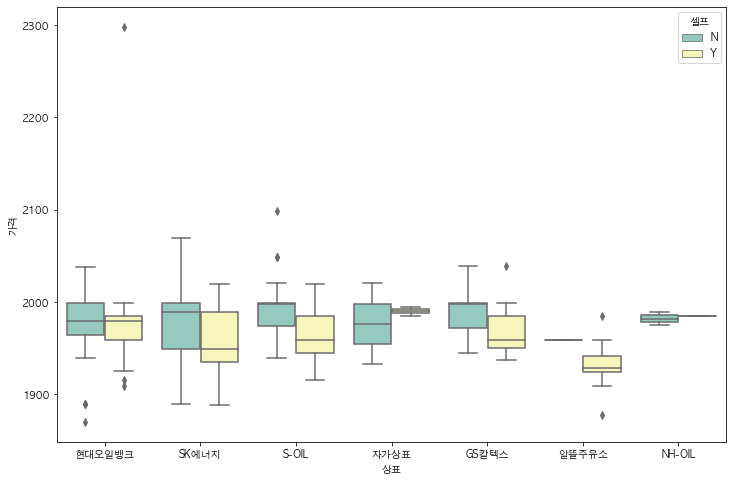

In [61]:
# 위 차트를 기준하여 광주광역시의 브랜드별 가격 출력
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=tmpDf, palette='Set3')
plt.show()

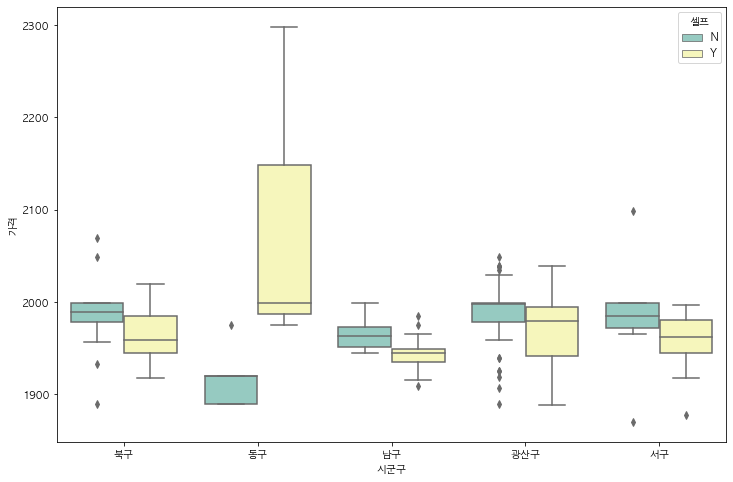

In [62]:
# 시군구에 따른 셀프/일반 휘발유 값 확인
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='시군구', y='가격', hue='셀프', data=tmpDf, palette='Set3')
plt.show()

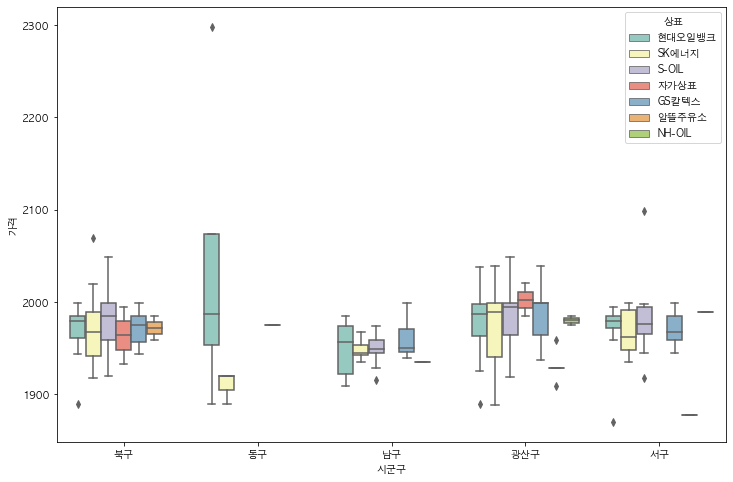

In [63]:
# 시군구에서 상표에 따른 가격
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='시군구', y='가격', hue='상표', data=tmpDf, palette='Set3')
plt.show()

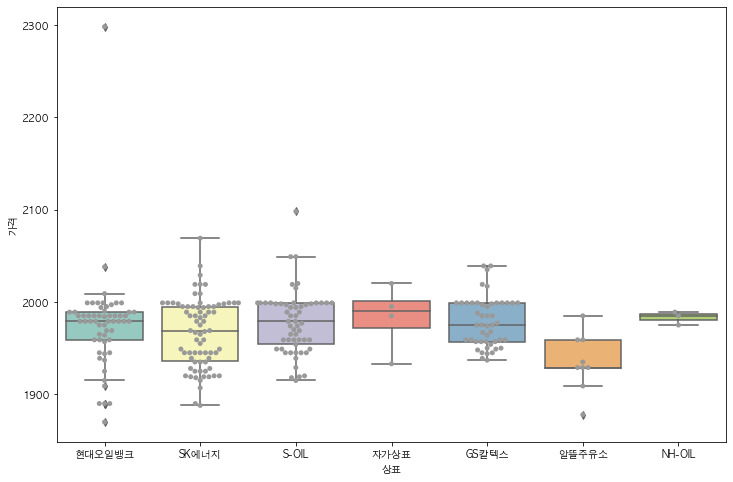

In [64]:
# 시군구에서 상표에 따른 가격
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', data=tmpDf, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=tmpDf, color='.6')
plt.show()

## 3. 서울시 구별 주유 가격 확인 
- 서울의 구별 경계위치를 이용한 지도차트 그리기

In [78]:
import folium
import json
import numpy

In [79]:
df_tmp = df_oil[df_oil["시도"]=='서울특별시']
df_tmp.head(3)

,시도,상호,주소,가격,셀프,상표,시군구
70,서울특별시,이엠석유(주)배꽃나라주유소,서울특별시 노원구 화랑로 466 (공릉1동),1946,Y,GS칼텍스,노원구
71,서울특별시,화랑대주유소,서울 노원구 화랑로 483,1946,Y,현대오일뱅크,노원구
72,서울특별시,현대오일뱅크㈜직영 하계주유소,서울 노원구 노원로17길 29 (하계동),1980,N,현대오일뱅크,노원구


#### `pivot_table` 함수를 이용해 구별 평균값 계산 

In [80]:
gu_p_df = pd.pivot_table(df_tmp, index=['시군구'], values = ['가격'], aggfunc = numpy.mean)
gu_p_df

""
시군구
강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구


In [81]:
# 가격 기준으로 내림차순 정렬  (큰값부터 출력)
gu_p_df.sort_values('가격', accending=False)

TypeError: sort_values() got an unexpected keyword argument 'accending'